In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

No handles with labels found to put in legend.


474


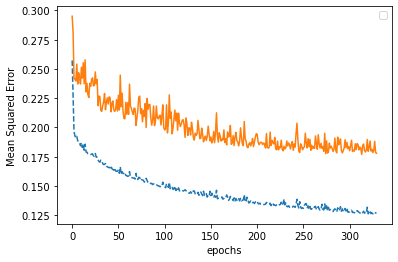

No handles with labels found to put in legend.


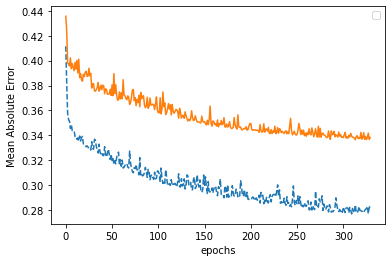

No handles with labels found to put in legend.


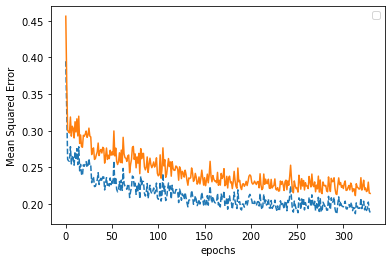

< OPT. SCORE_SUM EPOCH  242 > : -1.3414370008128382
opt. DEV MSE :  0.18322563026995467
opt. TEST1 MSE :  0.2010952414975604
opt. TEST2 MSE :  0.2255689790675571


In [13]:
Reg = False
ELBOW = 5
d = 'hybrid_LSTM'

if Reg :
    d += '_with_reg'
scores = pd.read_csv("models/"+d+".csv")
mse_columns = ['TRAIN_MSE','DEV_MSE']
mae_columns = ['TRAIN_MAE','DEV_MAE']
test_columns = ['TEST1_MSE', 'TEST2_MSE']

#print(scores)

end_epoch = scores.shape[0]
print(end_epoch)
plt.plot(scores[mse_columns[0]][:330][:end_epoch],'--')
plt.plot(scores[mse_columns[1]][:330][:end_epoch])
plt.legend()
plt.xlabel('epochs')
plt.ylabel('Mean Squared Error')
plt.show()
plt.close()
plt.plot(scores[mae_columns[0]][:330][:end_epoch],'--')
plt.plot(scores[mae_columns[1]][:330][:end_epoch])
plt.legend()
plt.xlabel('epochs')
plt.ylabel('Mean Absolute Error')
plt.show()
plt.close()
plt.plot(scores[test_columns[0]][:330][:end_epoch],'--')
plt.plot(scores[test_columns[1]][:330][:end_epoch])
plt.legend()
plt.xlabel('epochs')
plt.ylabel('Mean Squared Error')
plt.show()
plt.close()



score_diff = (scores[mse_columns[1]]-scores[mse_columns[0]])[ELBOW:]

score_sum = (scores[mse_columns[1]]+scores[mse_columns[0]])[ELBOW:]

score_diff_norm = (score_diff - np.mean(score_diff))/np.std(score_diff)
score_sum_norm = (score_sum - np.mean(score_sum))/np.std(score_sum)
score_total = score_diff_norm + score_sum_norm
idx = np.argmin(score_total)
print('< OPT. SCORE_SUM EPOCH ',str(idx+1),'> : '+str(score_total[idx]))
print('opt. DEV MSE : ',str(scores[mse_columns[1]][idx]))
print('opt. TEST1 MSE : ',str(scores[test_columns[0]][idx]))
print('opt. TEST2 MSE : ',str(scores[test_columns[1]][idx]))

# Other model testing

In [5]:
dev = pd.read_csv("dev.csv")
#dev_Y = pd.read_csv("C:/Users/Froilan/Desktop/myFiles/JupyterFiles/stock_correlation_prediction/train_dev_test/after_arima/dev_Y.csv")
test1 = pd.read_csv("test1.csv")
#test1_Y = pd.read_csv("C:/Users/Froilan/Desktop/myFiles/JupyterFiles/stock_correlation_prediction/train_dev_test/after_arima/test1_Y.csv")
test2 = pd.read_csv("test2.csv")
#test2_Y = pd.read_csv("C:/Users/Froilan/Desktop/myFiles/JupyterFiles/stock_correlation_prediction/train_dev_test/after_arima/test2_Y.csv")

dev = dev.loc[:, ~dev.columns.str.contains('^Unnamed')]
#dev_Y = dev_Y.loc[:, ~dev_Y.columns.str.contains('^Unnamed')]
test1 = test1.loc[:, ~test1.columns.str.contains('^Unnamed')]
#test1_Y = test1_Y.loc[:, ~test1_Y.columns.str.contains('^Unnamed')]
test2 = test2.loc[:, ~test2.columns.str.contains('^Unnamed')]
#test2_Y = test2_Y.loc[:, ~test2_Y.columns.str.contains('^Unnamed')]

In [9]:
STEP = 20
SIZE = 36540

In [10]:
dev_pred = np.array(dev['20'])
dev_y = np.array(dev['21']).reshape(1,int(SIZE/STEP))[0]
test1_pred = np.array(test1['21'])
test1_y = np.array(test1['22']).reshape(1,int(SIZE/STEP))[0]
test2_pred = np.array(test2['22'])
test2_y = np.array(test2['23']).reshape(1,int(SIZE/STEP))[0]

dev_mse = sum((dev_pred-dev_y)**2)/len(dev_pred)
dev_mae = sum(abs(dev_pred-dev_y))/len(dev_pred)
test1_mse = sum((test1_pred-test1_y)**2)/len(test1_pred)
test1_mae = sum(abs(test1_pred-test1_y))/len(test1_pred)
test2_mse = sum((test2_pred-test2_y)**2)/len(test2_pred)
test2_mae = sum(abs(test2_pred-test2_y))/len(test2_pred)

hist_matrix = [[dev_mse, dev_mae], [test1_mse, test1_mae], [test2_mse, test2_mae]]
for i in hist_matrix :
    print(str(i[0]) + '/' + str(i[1]))

0.4587124615436811/0.5439779356186987
0.5259016426577011/0.5883900878645424
0.733284334571628/0.7040778126018975


# Constant Correlation model

In [11]:
pred = sum(dev['20'])/int(SIZE/STEP)
dev_pred = np.array([pred] * int(SIZE/STEP))
pred = sum(test1['21'])/int(SIZE/STEP)
test1_pred = np.array([pred] * int(SIZE/STEP))
pred = sum(test2['22'])/int(SIZE/STEP)
test2_pred = np.array([pred] * int(SIZE/STEP))

dev_mse = sum((dev_pred-dev_y)**2)/len(dev_pred)
dev_mae = sum(abs(dev_pred-dev_y))/len(dev_pred)
test1_mse = sum((test1_pred-test1_y)**2)/len(test1_pred)
test1_mae = sum(abs(test1_pred-test1_y))/len(test1_pred)
test2_mse = sum((test2_pred-test2_y)**2)/len(test2_pred)
test2_mae = sum(abs(test2_pred-test2_y))/len(test2_pred)

cc_matrix = [[dev_mse, dev_mae], [test1_mse, test1_mae], [test2_mse, test2_mae]]
for i in cc_matrix :
    print(str(i[0]) + '/' + str(i[1]))

0.2858166127241112/0.4564487848090963
0.2816345093293468/0.45618346148192274
0.5188821807442646/0.6780131888683695
